In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# About the Data

Our dataset for this exercise was obtained from the UCI Machine Learning Repository, and we will be evaluating a dataset with information about breast cancer in Madison, Wisconsin. Our dataset contains a list of 699 patients and a somewhat condensed dataset of columns detailing the patients' 
1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

# Objective

The objective for this project is to determine if we can use patients' measurements in order to predict the likelihood of breast cancer.

In [25]:
# Importing our data
data = pd.read_csv('Data\\breast-cancer-wisconsin.data', delimiter=',', header =None, encoding ='latin8')
data.columns = ['id_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion',
             'single_epithetial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

# Drop all null values in the dataset
data = data.dropna()

In [20]:
# Prints the size of our dataset
data.shape

(683, 11)

In [26]:
# Print the datatypes in our dataframe
data.dtypes

id_number                       int64
clump_thickness                 int64
uniformity_cell_size            int64
uniformity_cell_shape           int64
marginal_adhesion               int64
single_epithetial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

It looks like we have an object datatype where we should have another integer datatype. The following two lines should remedy this issue.

In [ ]:
# Removes non-numeric entries from bare_nuclei
data = data[data.bare_nuclei.apply(lambda x: x.isnumeric())]
data['bare_nuclei'] = data['bare_nuclei'].astype(np.int64)

In [4]:
# Set up the target variable as an array
Y = np.where(data['class'] == 4, 1, 0)

# Remove id and class from the dataframe
X = data.drop('id_number', axis=1)
X = X.drop('class', axis=1)

In [27]:
# View the statistics in the dataframe
data.describe()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithetial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Text(0.5,1,'Distribution of predictor variables')

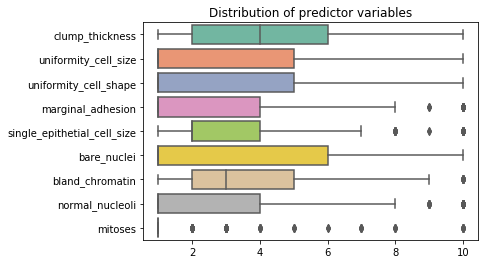

In [6]:
# Create boxplot for all numeric variables
sns.boxplot(data = X, orient ='h', palette = 'Set2')
plt.title('Distribution of predictor variables')

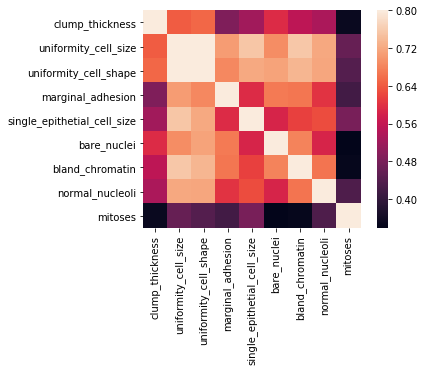

In [7]:
# Creating a correlation matrix
healthmat = X.corr()
sns.heatmap(healthmat, vmax = 0.8, square = True)
plt.show()

By examining our correlation matrix, we can see that uniformity_cell_shape and uniformity_cell_size are far too similar when comparing with each over, having at least an 80% match. Since this is too high, we'll have to drop one of them before proceeding.

In [8]:
# Dropping uniformity_cell_shape since it overlaps too much
# with uniformity_cell_size
X = X.drop('uniformity_cell_shape', axis=1)

(-1.1156682582755633,
 1.1129564944589363,
 -1.1143106757747783,
 1.1172903345825824)

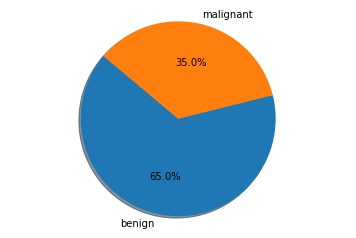

In [10]:
# Creates a pie chart that represents the different categories in our dataset
plt.pie(np.bincount(Y), labels=['benign', 'malignant'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

Our classes aren't entirely balanced, but we have enough observations in both categories for this model to work.

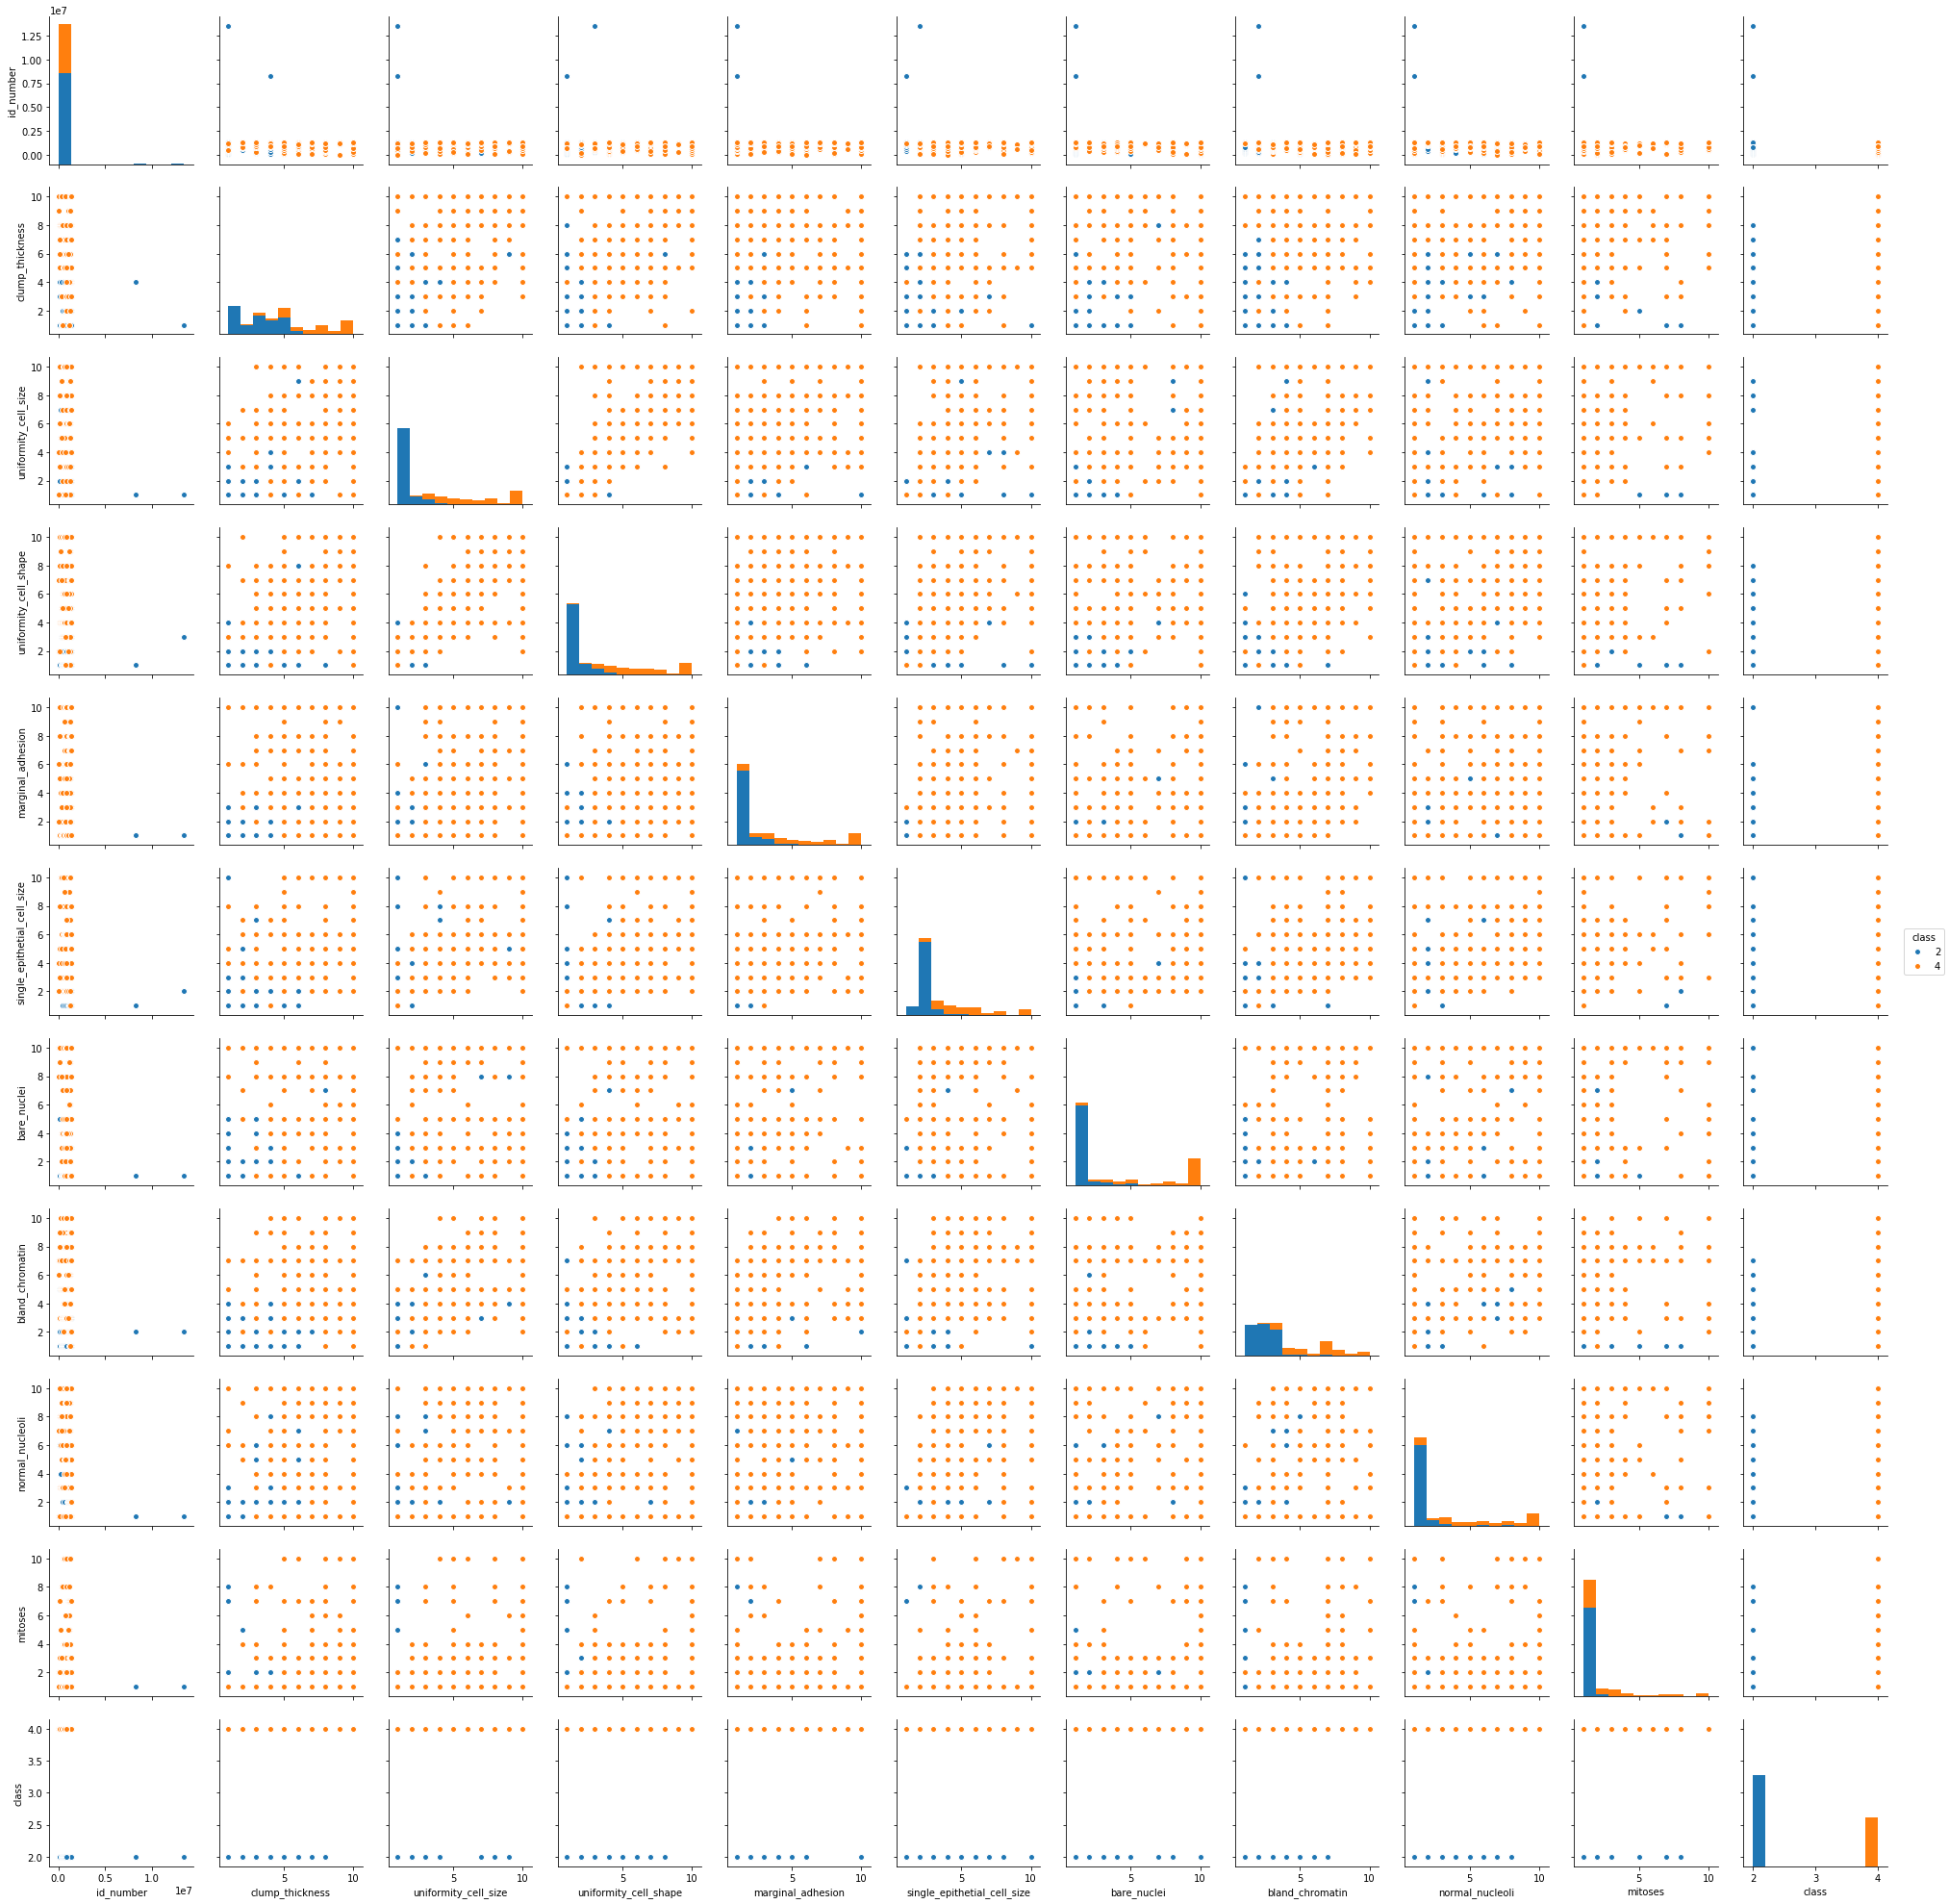

In [9]:
# Plot correlation between predictor variables and
# the target variable
pp = sns.pairplot(data, hue = 'class', size = 2.5)

# Logistic Regression Model

In [11]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [12]:
# Constructing our logistic regression model
lr = LogisticRegression(C = 1e9)

# Checking the accuracy of our model using cross validation
cross_val_score(lr, X_train, y_train, cv=5)

array([0.95652174, 0.97101449, 0.98529412, 0.97058824, 0.92537313])

In [13]:
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

confusion_matrix(y_test, lr_pred)

array([[221,   6],
       [  8, 107]], dtype=int64)

# Conclusion

Our objective was to determine if we can predict a cancer diagnosis based on other measurements for each patient. In our logistic regression model, we are able to predict the result with roughly 96% accuracy, assuming that we have all of the measurements.